<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass-Lab  <br>(Week 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Earthquake data)
The data records the earthquakes experienced for the last few years in the USA. There are four parameters in the data, where each data point represents an earthquake.

**Latitude**: Latitude of the place (above the equator)

**Longitude**: Longitude of the place (west of the prime meridian)

**DepthMeters**: Absolute height of the place

**Magnitude**: Magnitude of the earthquake wave

## Table of Content

1. **[Exploratory Data Analysis](#eda)**
2. **[K-means Clustering](#k-means)**
3. **[Interpret the Clusters](#inter)**

#### Import the required libraries

In [1]:
# write your code here
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

#### Load the csv file and print the first five observations.

In [3]:
# write your code here
data=pd.read_csv('/content/Earthquake_Data.csv')
data.head()

,Latitude,Longitude,DepthMeters,Magnitude
0,39.644,-75.483,5000,2.8
1,37.379,-80.746,11500,2.8
2,45.296,-73.475,18000,2.1
3,42.825,-78.239,5000,2.4
4,38.619,-80.909,100,3.4


### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find the number of variables and the number of observations in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# write your code here
data.shape

(1647, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype of each variable in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Latitude     1647 non-null   float64
 1   Longitude    1647 non-null   float64
 2   DepthMeters  1647 non-null   int64  
 3   Magnitude    1647 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 51.6 KB


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Find if there are missing values in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# write your code here
data.isnull().sum()

Latitude       0
Longitude      0
DepthMeters    0
Magnitude      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Obtain the summary statistic of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# write your code here
data.describe()

,Latitude,Longitude,DepthMeters,Magnitude
count,1647.000000,1647.000000,1647.000000,1647.000000
mean,39.903436,-79.008111,7559.720704,2.384827
std,2.410973,3.192442,5205.963953,0.459781
min,37.007700,-82.881000,100.000000,0.200000
25%,37.902400,-81.694150,3450.000000,2.100000
50%,38.477800,-80.831400,6400.000000,2.400000
75%,41.467200,-75.934050,11500.000000,2.600000
max,45.300900,-73.063400,32300.000000,5.200000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the outliers in the dataset using boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

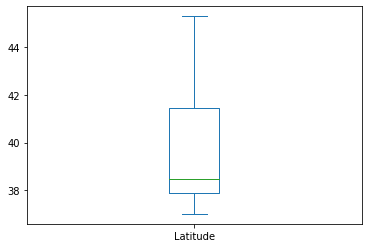

In [11]:
# write your code here
data['Latitude'].plot.box()

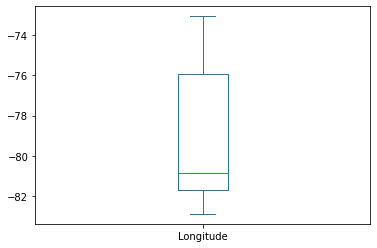

In [12]:
data['Longitude'].plot.box()

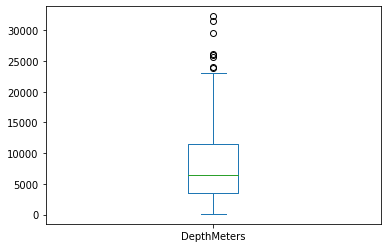

In [14]:
data['DepthMeters'].plot.box()

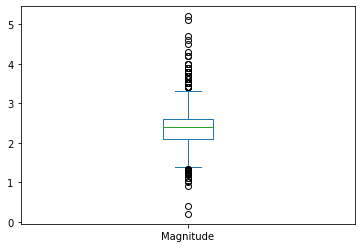

In [15]:
data['Magnitude'].plot.box()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Remove the outliers using the IQR method and check the shape of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# write your code here
# write your code here
def identify_outlier(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  rowindex = df.index[((df[col]<(Q1-1.5*IQR)) | (df[col]>(Q3 + 1.5*IQR)))]
  return rowindex


In [17]:
#copy the index values of outliers
row_index = []
for col in data.columns:
  row_index.extend(identify_outlier(data, col))


In [18]:
#remove rows with indices from outlier list
clean_data = data.drop(row_index)


In [19]:
clean_data.shape

(1562, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Drop the variables representing the geographical coordinates of the earthquake.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# write your code here
clean_data=clean_data.drop(['Latitude','Longitude'],axis=1)

In [21]:
clean_data.head()

,DepthMeters,Magnitude
0,5000,2.8
1,11500,2.8
2,18000,2.1
3,5000,2.4
5,2300,2.4


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables such that it will have mean 0 and standard deviation 1 and print the summary statistics.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# write your code here
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
data=std.fit_transform(clean_data)

In [25]:
data=pd.DataFrame(data,columns=['DepthMeters','Magnitude'])
data.head()

,DepthMeters,Magnitude
0,-0.488908,1.252394
1,0.803530,1.252394
2,2.095968,-0.735020
3,-0.488908,0.116729
4,-1.025767,0.116729


In [27]:
round(data.describe())

,DepthMeters,Magnitude
count,1562.0,1562.0
mean,0.0,0.0
std,1.0,1.0
min,-1.0,-3.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,3.0,3.0


<a id="k-means"> </a>
## 2. K-means Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find within cluster sum of squares for the number of clusters from 1 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# write your code here
# write your code here
from sklearn.cluster import KMeans
wcss = []
for i in range (1,8):
  kmean = KMeans(i)
  kmean.fit(data)
  wcss.append(kmean.inertia_)



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the elbow plot to get the optimal value of K.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

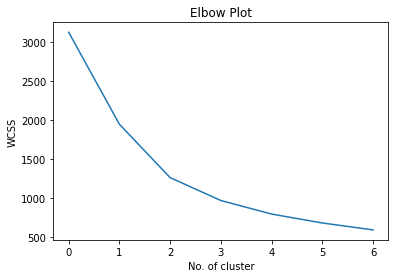

In [29]:
# write your code here
# write your code here
import matplotlib.pyplot as plt
plt.plot(wcss)
plt.title('Elbow Plot')
plt.xlabel('No. of cluster')
plt.ylabel('WCSS')
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the silhouette coefficient for the number of clusters from 2 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# write your code here
# write your code here
from sklearn.metrics import silhouette_score
sc_score = []
for i in range(2,8):
  kmean = KMeans(i)
  kmean.fit(data)
  label = kmean.predict(data)
  print(f'silhouette score : {silhouette_score(data, label)}')
  sc_score.append(silhouette_score(data, label))



silhouette score : 0.3743704735416158
silhouette score : 0.39268003903375004
silhouette score : 0.3675083071920705
silhouette score : 0.34375295577857407
silhouette score : 0.34579021420417705
silhouette score : 0.34212886826688554


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Plot of silhouette coefficients using appropriate graphical method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

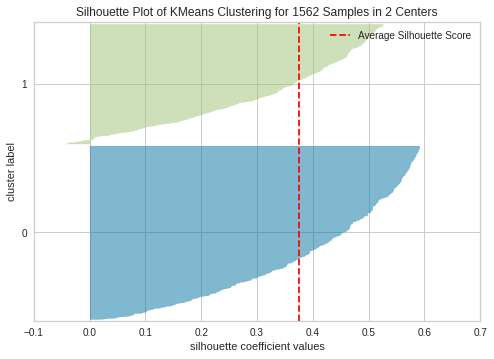

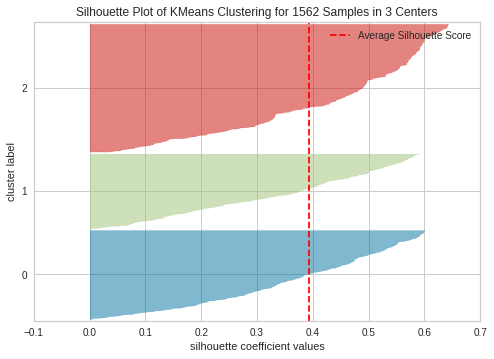

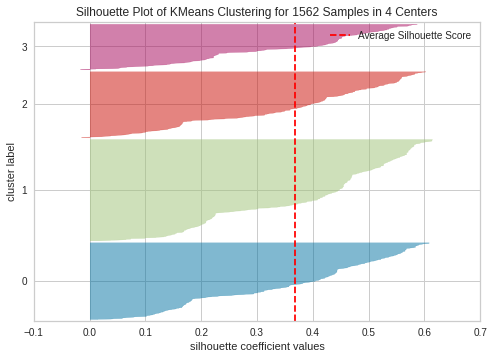

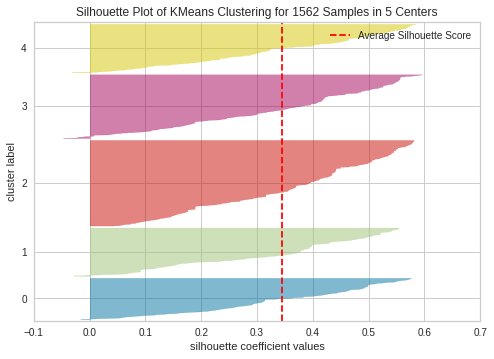

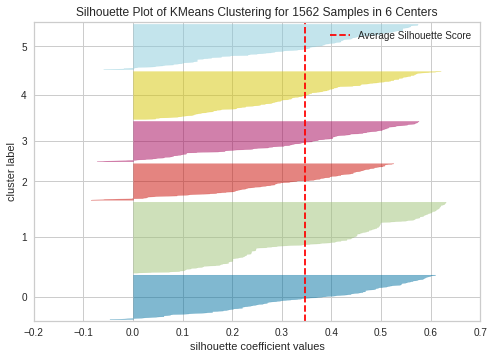

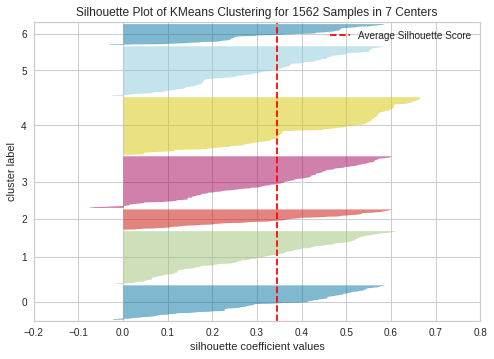

In [30]:
# write your code here
from yellowbrick.cluster.silhouette import SilhouetteVisualizer

for i in range(2,8):
  kmean = KMeans(i)
  vis = SilhouetteVisualizer(kmean, colors = 'yellowbrick')
  vis.fit(data)
  vis.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Visualize the silhouette scores using silhouette plot and obtain the clusters for K from 2 to 6.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# write your code here


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Fit K means clustering algorithm with an optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# write your code here
model=KMeans(3)
m=model.fit(data)

<a id="inter"> </a>
## 3. Interpret the Clusters

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Consider the groups formed in the previous question and display the size of each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# write your code here
data['cluster']=m.labels_
data['cluster'].value_counts()

1    685
2    477
0    400
Name: cluster, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Plot the number of observations in each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

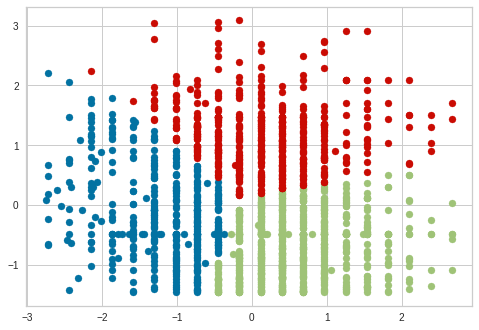

In [34]:
# write your code here
# write your code here
label0 = data[data['cluster']==0]
label1 = data[data['cluster']==1]
label2  = data[data['cluster']==2]
plt.scatter(label0['Magnitude'], label0['DepthMeters'])
plt.scatter(label1['Magnitude'], label1['DepthMeters'])
plt.scatter(label2['Magnitude'], label2['DepthMeters'])
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the centroids of the clusters formed using K-means clustering.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# write your code here
m.cluster_centers_

array([[-0.16849241, -1.21277955],
       [-0.71964524,  0.59192623],
       [ 1.17474623,  0.16696511]])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Obtain the observations belonging to the 1st cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# write your code here
label0.describe()

,DepthMeters,Magnitude,cluster
count,400.000000,400.000000,400.0
mean,-0.168492,-1.212780,0.0
std,0.732445,0.601168,0.0
min,-1.463207,-2.750825,0.0
25%,-0.647977,-1.586768,0.0
50%,-0.290071,-1.018936,0.0
75%,0.261203,-0.735020,0.0
max,2.215270,-0.365928,0.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the observations belonging to the 2nd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# write your code here
label1.describe()

,DepthMeters,Magnitude,cluster
count,685.000000,685.000000,685.0
mean,-0.719645,0.591926,1.0
std,0.500074,0.651461,0.0
min,-1.463207,-0.451103,1.0
25%,-1.184836,0.116729,1.0
50%,-0.747395,0.400645,1.0
75%,-0.369606,0.968478,1.0
max,0.505275,2.671975,1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Obtain the observations belonging to the 3rd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
# write your code here
label2.describe()

,DepthMeters,Magnitude,cluster
count,477.000000,477.000000,477.0
mean,1.174746,0.166965,2.0
std,0.566041,0.774963,0.0
min,0.167253,-2.154601,2.0
25%,0.763763,-0.451103,2.0
50%,1.121669,0.116729,2.0
75%,1.479575,0.684562,2.0
max,3.090151,2.671975,2.0
